## PRCP-1025-FlightPricePrediction

# Problem Statement
Flight ticket prices can be something hard to guess, today we might see a price, check
out the price of the same flight tomorrow, it will be a different story. We might have often
heard travelers saying that flight ticket prices are so unpredictable. That’s why we will
try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain.

# Dataset Overview
1. Airline: So this column will have all the types of airlines like Indigo, Jet Airways,
Air India, and many more.
2. Date_of_Journey: This column will let us know about the date on which the
passenger’s journey will start.
3. Source: This column holds the name of the place from where the passenger’s
journey will start.
4. Destination: This column holds the name of the place to where passengers
wanted to travel.
5. Route: Here we can know about what the route is through which passengers
have opted to travel from his/her source to their destination.
6. Arrival_Time: Arrival time is when the passenger will reach his/her destination.

7. Duration: Duration is the whole period that a flight will take to complete its
journey from source to destination.
8. Total_Stops: This will let us know in how many places flights will stop there for
the flight in the whole journey.
9. Additional_Info: In this column, we will get information about food, kind of food,
and other amenities.
10. Price: Price of the flight for a complete journey including all the expenses
before onboarding.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_excel("/content/Flight_Fare.xlsx")
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [ ]:
df.tail(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


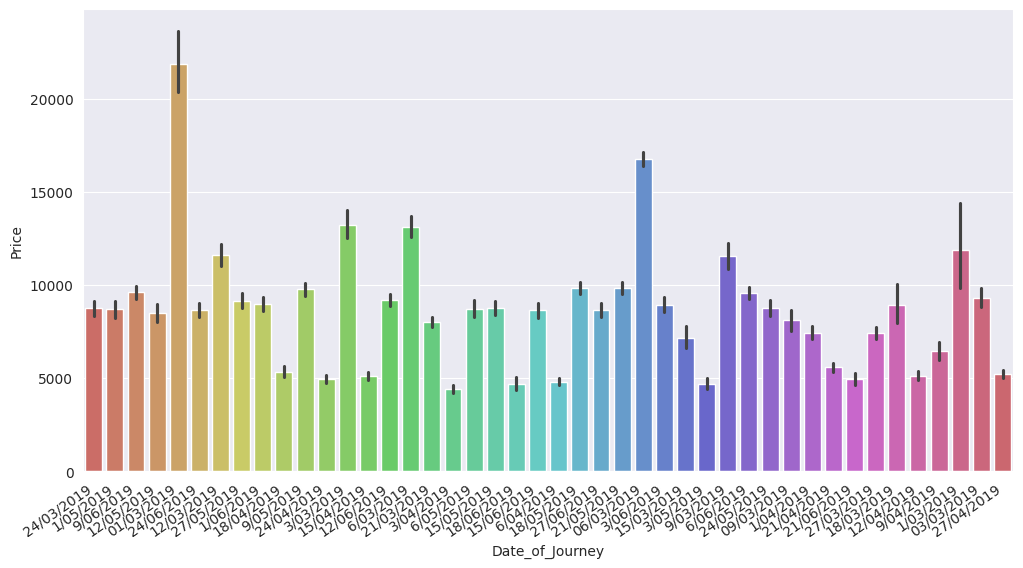

In [ ]:
df.groupby("Date_of_Journey")["Price"].mean()
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Date_of_Journey", y="Price",palette='hls')
plt.xticks(rotation=35, ha='right')
plt.show()



##### To convert journey dates and times from strings to datetime objects, we can use the pd.to_datetime() function in pandas. This involves concatenating the journey date and time strings into a single string that represents the complete datetime format. By applying pd.to_datetime(), we effectively transform these strings into datetime objects.






In [ ]:

df["Dep_Time"] = pd.to_datetime(df["Dep_Time"], errors='coerce').dt.time
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"], errors='coerce').dt.time
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], errors='coerce').dt.date

In [ ]:
df.describe()


,Date_of_Journey,Price
count,10683,10683.000000
mean,2019-05-04 19:56:41.853412096,9087.064121
min,2019-03-01 00:00:00,1759.000000
25%,2019-03-27 00:00:00,5277.000000
50%,2019-05-15 00:00:00,8372.000000
75%,2019-06-06 00:00:00,12373.000000
max,2019-06-27 00:00:00,79512.000000
std,NaN,4611.359167


In [ ]:
df.describe(include="object")

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,5,6,128,222,223,368,5,10
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18:55:00,19:00:00,2h 50m,1 stop,No info
freq,3849,4537,4537,2376,233,618,550,5625,8345


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
df.duplicated().sum()

222

In [ ]:
df.drop_duplicates(inplace=True)

### Effective Data Visualization:

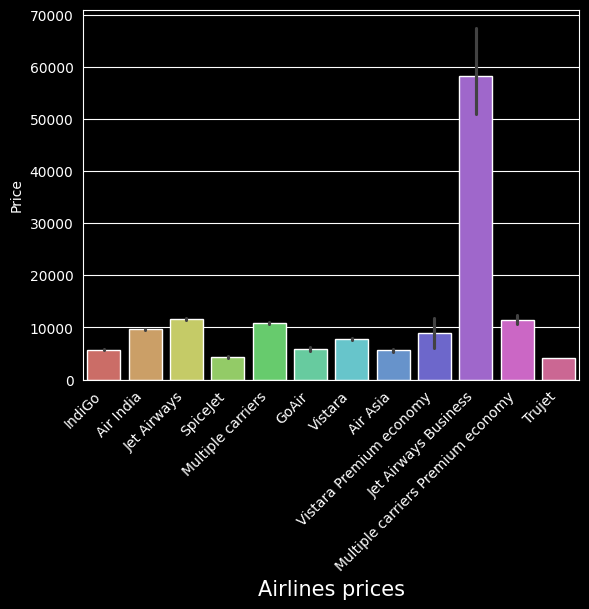

In [ ]:
df.groupby("Airline")["Price"].mean().sort_values(ascending=False)
sns.barplot(data=df,x= "Airline",y="Price",palette='hls')
plt.xlabel("Airlines prices",fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()


#### Jet Airways Business has highest price in flight fare dataset.




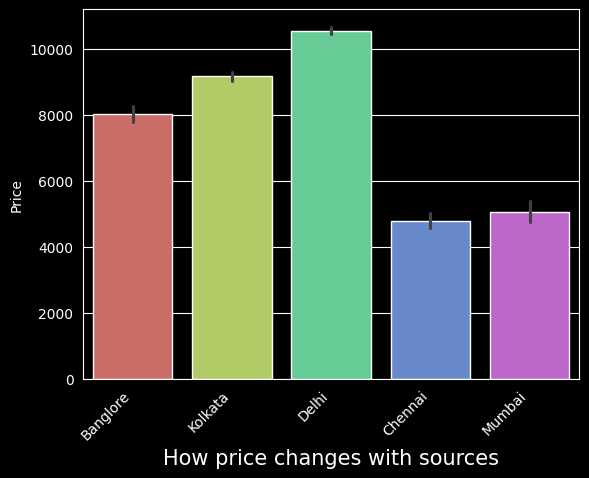

In [ ]:
sns.barplot(data=df,x="Source",y="Price",palette='hls')
plt.xlabel("How price changes with sources",fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()

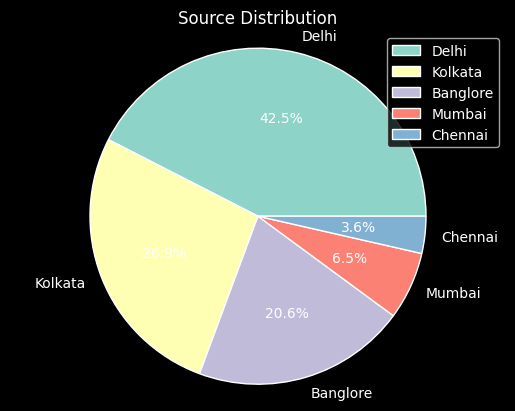

In [ ]:
labels = df['Source'].value_counts().index
values = df['Source'].value_counts().values
plt.pie(values, labels=labels, autopct='%2.1f%%')
plt.legend()
plt.title('Source Distribution')
plt.axis('equal')
plt.show()

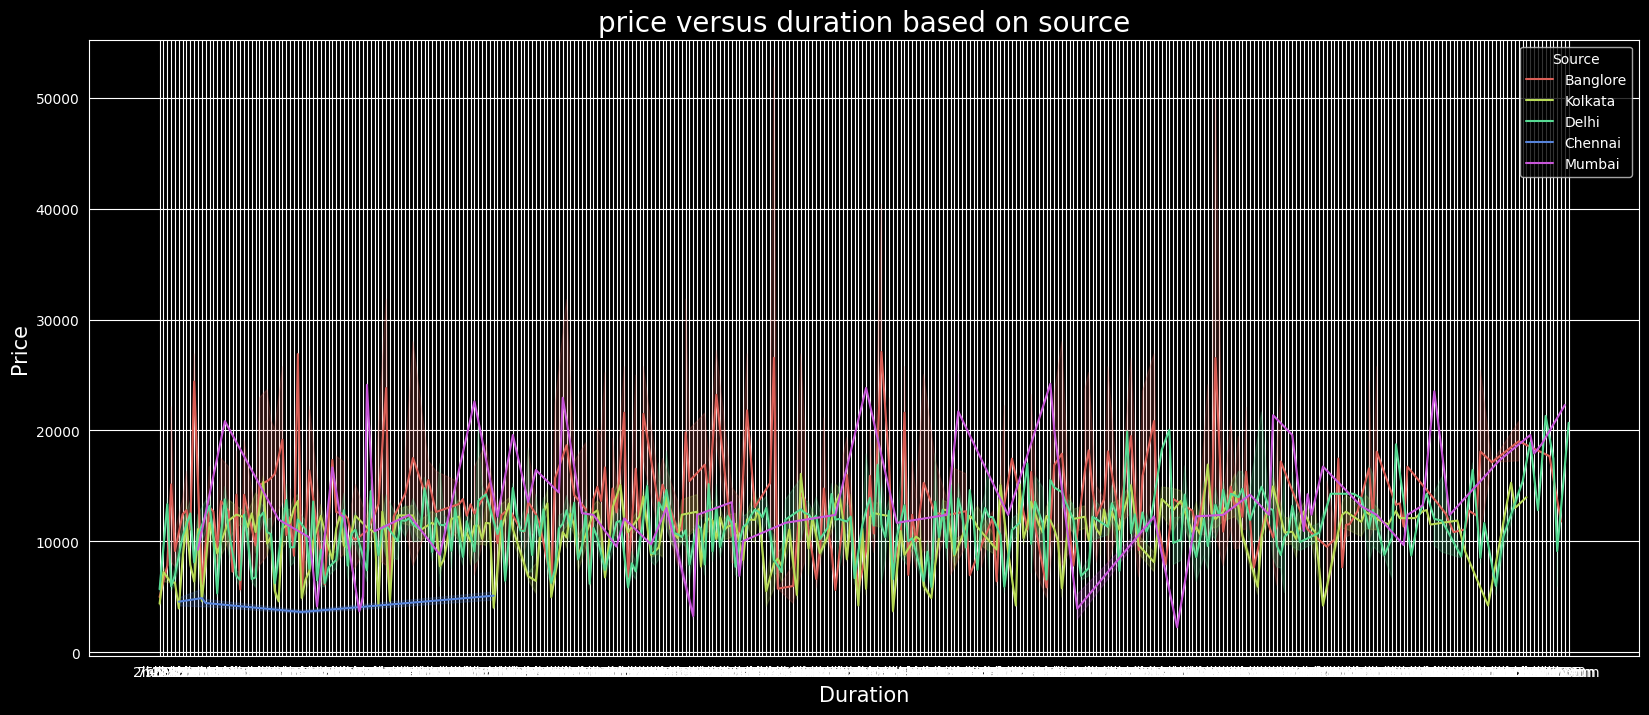

In [ ]:
#line plot
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='Duration',y='Price', hue='Source',palette='hls')
plt.title('price versus duration based on  the source',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

#### I am converting  elow the duration from string format into numerical data by extracting the hours and minutes. By multiplying the hours by 60 and adding the minutes, I am representing the duration in total minutes. This transformation allows for more effective numerical analysis and comparisons of flight durations.

In [ ]:

df["Duration"]=df["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [ ]:
df.drop(["Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
df.shape

(10461, 9)

In [ ]:
df.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Route,1
Duration,0
Total_Stops,1
Additional_Info,0
Price,0
Day,0
Month,0


#### we have Route and Total_stop both have  missing values, Replacing by its mode, as both are categorical in nature.


In [ ]:
df["Route"].fillna(df["Route"].mode()[0],inplace=True)
df["Total_Stops"].fillna(df["Total_Stops"].mode()[0],inplace=True)


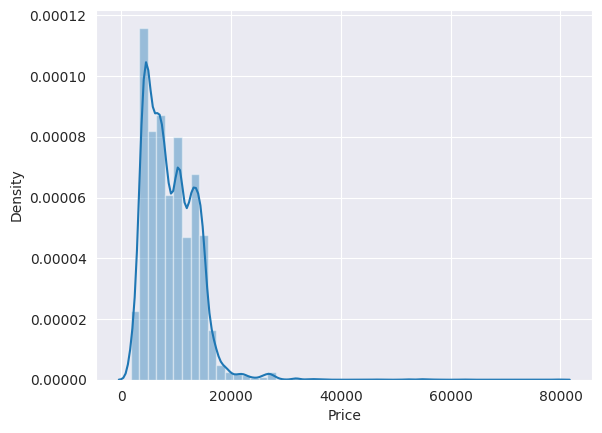

In [ ]:
sns.distplot(df["Price"])
plt.show()

### Changing categorical values in to numerical value


In [ ]:
df["Price"].describe()

,Price
count,10461.000000
mean,9027.212504
std,4624.861032
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12346.000000
max,79512.000000


In [ ]:
# checking unique values of each cstegorical
df["Airline"].value_counts()

,count
Airline,
Jet Airways,3700
IndiGo,2043
Air India,1695
Multiple carriers,1196
SpiceJet,815
Vistara,478
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [ ]:
df["Source"].value_counts()

,count
Source,
Delhi,4346
Kolkata,2860
Banglore,2179
Mumbai,697
Chennai,381


In [ ]:
df['Destination'].value_counts()

,count
Destination,
Cochin,4346
Banglore,2860
Delhi,1265
New Delhi,914
Hyderabad,697
Kolkata,381


In [ ]:
df['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5626
non-stop,3475
2 stops,1318
3 stops,43
4 stops,1


In [ ]:
df["Route"].value_counts()

,count
Route,
DEL → BOM → COK,2377
BLR → DEL,1536
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
...,...
CCU → VTZ → BLR,1
CCU → IXZ → MAA → BLR,1
BOM → COK → MAA → HYD,1


In [ ]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8183
In-flight meal not included,1926
No check-in baggage included,318
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


### In this column most of the unique value lies in "No info", so this column is not giving us important infotmation. Its better to drop this column.


In [ ]:
df.drop("Additional_Info",axis=1,inplace=True)

### Converting categorical columns into numerical

In [ ]:
categorical_col = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops']
pd.get_dummies(df[categorical_col], drop_first=True)
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col])


In [ ]:
start_date = df['Date_of_Journey'].min()
df['Days_Since'] = (df['Date_of_Journey'] - start_date).dt.days
df.drop("Date_of_Journey",axis=1,inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
numerical_col=["Days_Since","Duration",]

for columns in numerical_col:
  ss.fit(df[[columns]])
  df[columns]=ss.transform(df[[columns]])



In [ ]:
x= df.drop("Price",axis=1)
y=df["Price"]

## Applying ML Algorithm
### Random Forest

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)


RandomForestRegressor()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_squared_log_error
y_pred=rf.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_log_error(y_test,y_pred))

0.754778424012222
5189861.110325704
1262.897960273864
0.039707219165562815


### Decision Tree

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_log_error(y_test,y_pred))


0.6118469772267161
8214857.398383391
1424.3615773998786
0.05326691068446989


### GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.793268624816732
4375255.807022745
1484.5316171197958


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(r2_score(y_test,y_pred))

0.7334123224796343


In [ ]:
print("Training R² Score:", train_score)
print("Test R² Score:", test_score)

Training R² Score: 0.9310602576527405
Test R² Score: 0.7571655623199057


#### I evaluated the model using four different algorithms, each yielding distinct R² scores. This comparative analysis allows us to assess the performance of each algorithm in predicting the target variable. The difference between  training and test R² scores indicates that while  model is fitting the training data very well, it struggles to generalize to new data. By taking steps to reduce overfitting through hyperparameter tuning, regularization, and feature selection, we can enhance our model's ability to perform well on unseen data and achieve a more balanced performance across training and testing datasets.